In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import time
from scipy.optimize import minimize

In [24]:
#Cargar las funciones a optimizar 

def funcion_ackley(x):
    a = 20
    b = 0.2
    c = 2 * np.pi
    d = len(x)
    sum1 = np.sum(x**2)
    sum2 = np.sum(np.cos(c * x))
    term1 = -a * np.exp(-b * np.sqrt(sum1 / d))
    term2 = -np.exp(sum2 / d)
    return term1 + term2 + a + np.exp(1)

def funcion_cuadratica(x):
    # Coeficientes cuadráticos
    A = np.array([[2, 1], [1, 2]])  # Matriz de coeficientes cuadráticos (positiva definida)
    # Coeficientes lineales
    C = np.array([-6, -4])  # Vector de coeficientes lineales
    # Término constante
    D = 10  # Término constante

    # Calcular el valor de la función cuadrática
    resultado = 0.5 * np.dot(x.T, np.dot(A, x)) + np.dot(C, x) + D
    return resultado



# Algoritmo de obtimización por ejambre de partículas (PSO) estándar

In [43]:

# Métodos que construyen el algoritmo de PSO
def initialize_particles(n_particulas, dimensiones, lim_inf, lim_sup):
    """
    Inicializa las posiciones y velocidades de las partículas.

    Args:
    n_particulas (int): Número de partículas.
    dimensiones (int): Dimensiones del espacio de búsqueda.
    lim_inf (array): Límite inferior del espacio de búsqueda.
    lim_sup (array): Límite superior del espacio de búsqueda.

    Returns:
    posiciones (array): Posiciones iniciales de las partículas.
    velocidades (array): Velocidades iniciales de las partículas.
    """
    #Usa distribución uniforme
    # Inicializar posiciones de partículas dentro de los límites especificados crando una matriz
    posiciones = np.random.uniform(lim_inf, lim_sup, (n_particulas, dimensiones))
    # Inicializar velocidades de partículas dentro de un rango creando una matriz
    velocidades = np.random.uniform(-(lim_sup - lim_inf), lim_sup - lim_inf, (n_particulas, dimensiones))
    return posiciones, velocidades

#posiciones, velocidades = initialize_particles(5, 1,-5, 5)
#print(posiciones)
#print(velocidades)



def pso(funcion_aptitud, dimensiones, lim_inf, lim_sup, n_particulas=30, w=0.5, c1=1.5, c2=1.5, max_iter=100):
    """
    Implementa el algoritmo PSO estándar.

    Args:
    - funcion_aptitud: Función objetivo que se quiere minimizar.
    - dimensiones: Dimensiones del espacio de búsqueda.
    - lim_inf: Límite inferior del espacio de búsqueda.
    - lim_sup: Límite superior del espacio de búsqueda.
    - n_particulas: Número de partículas.
    - w: Factor de inercia.
    - c1: Coeficiente cognitivo (atracción hacia la mejor posición personal).
    - c2: Coeficiente social (atracción hacia la mejor posición global).
    - max_iter: Número máximo de iteraciones.

    Returns:
    - mejor_posicion_global: Mejor posición global encontrada.
    - mejor_valor_global: Valor de la función objetivo en la mejor posición global encontrada.
    """
    # Inicialización de posiciones y velocidades
    posiciones, velocidades = initialize_particles(n_particulas, dimensiones, lim_inf, lim_sup)
    # Inicialización de las mejores posiciones personales y sus valores de aptitud
    pBest_posiciones = np.copy(posiciones)
    #Mejores Valores Personales: se evalúa la función objetivo en cada posición inicial en un array
    pBest_valores = np.array([funcion_aptitud(p) for p in posiciones])
    
    # Encuentra el índice de la partícula con el valor de aptitud más bajo (mejor).
    gBest_idx = np.argmin(pBest_valores)
    #accede a la fila del indice (gBest_idx) para tener la mejor posicion
    gBest_posicion = pBest_posiciones[gBest_idx]
    #accede a la fila del indice (gBest_idx) para tener el valor del mejor punto de la funcion
    gBest_valor = pBest_valores[gBest_idx]
    
    # Iteración principal del PSO
    for iteracion in range(max_iter):
        for i in range(n_particulas):
            # Generar números aleatorios para las componentes cognitiva y social
            r1 = np.random.rand(dimensiones)
            r2 = np.random.rand(dimensiones)
            # Actualizar la velocidad de la partícula según la fórmula del PSO estándar
            velocidades[i] = (w * velocidades[i] + 
                              c1 * r1 * (pBest_posiciones[i] - posiciones[i]) + 
                              c2 * r2 * (gBest_posicion - posiciones[i]))
            # Actualizar la posición de la partícula
            posiciones[i] += velocidades[i]
            # Limitar las posiciones a los límites especificados
            posiciones[i] = np.clip(posiciones[i], lim_inf, lim_sup)
        
        # Evaluar la función objetivo y actualizar las mejores posiciones personales y globales
        for i in range(n_particulas):
            aptitud = funcion_aptitud(posiciones[i])
            # Actualizar la mejor posición personal (pBest) si la nueva posición es mejor
            if aptitud < pBest_valores[i]:
                pBest_posiciones[i] = posiciones[i]
                pBest_valores[i] = aptitud
                # Actualizar la mejor posición global (gBest) si la nueva posición es mejor
                if aptitud < gBest_valor:
                    gBest_posicion = posiciones[i]
                    gBest_valor = aptitud
        
                    
    return gBest_posicion, gBest_valor, max_iter

def funcion_cuadratica(x):
    # Coeficientes cuadráticos
    A = np.array([[2, 1], [1, 2]])  # Matriz de coeficientes cuadráticos (positiva definida)
    # Coeficientes lineales
    C = np.array([-6, -4])  # Vector de coeficientes lineales
    # Término constante
    D = 10  # Término constante

    # Calcular el valor de la función cuadrática
    resultado = 0.5 * np.dot(x.T, np.dot(A, x)) + np.dot(C, x) + D

    return resultado

inicio = time.time()
dimensiones = 2  # Cambia este valor para cualquier número de dimensiones
lim_inf = np.array([-10.0] * dimensiones)
lim_sup = np.array([10.0] * dimensiones)

mejor_posicion, mejor_valor, num_iteracion = pso(funcion_cuadratica, dimensiones, lim_inf, lim_sup, n_particulas=30, w=0.5, c1=1.5, c2=1.5, max_iter=100)
print(f'Número de iteración: {num_iteracion}')
print(f"Mejor posición: {mejor_posicion}")
print(f"Mejor valor: {mejor_valor}")

fin = time.time()

print(f'Tiempo de ejecución: {fin - inicio}')

Número de iteración: 100
Mejor posición: [2.66666667 0.66666677]
Mejor valor: 0.6666666666666661
Tiempo de ejecución: 0.05000615119934082


## Método que ejecuta cinco veces el modelo PSO estándar.

In [46]:
def calculo_result_enjambre(funcion,dimensiones, num_particulas, max_itera, lim_inf, lim_sup):
    #Inicialización de listas para almacenar los resultados
    tiempos_ejecucion = []
    run = []
    resultados_gradiente = []
    valores_optimos = []
    for i in range(1, 6):
        inicio = time.time()
        mejor_posicion, mejor_valor, num_iteracion = pso(funcion_cuadratica, dimensiones, lim_inf, lim_sup, n_particulas=num_particulas, w=0.5, c1=1.5, c2=1.5, max_iter=max_itera)
        fin = time.time()
        
        # Almacenar los resultados en las listas
        tiempos_ejecucion.append(fin - inicio)
        run.append(i)
        valores_optimos.append(mejor_valor)
        
     # Crear el DataFrame con los datos recopilados
    df = pd.DataFrame({
        'Run' : run,
        'Tiempo_estandar': tiempos_ejecucion,
        'valor_optimo_estandar': valores_optimos
    })
    
    # Calcular los promedios
    promedios = {
        'Run': 'Media',
        'Tiempo_estandar': np.mean(tiempos_ejecucion),
        'valor_optimo_estandar': np.mean(valores_optimos)
    }
    
    # Crear un DataFrame para la fila de promedios
    df_promedios = pd.DataFrame([promedios])    
    # Agregar la fila de promedios al DataFrame original usando pd.concat
    #df = pd.concat([df, df_promedios], ignore_index=True)
    return pd.concat([df, df_promedios], ignore_index=True)

calculo_result_enjambre(funcion_cuadratica,2, 30, 10000, -10, 10)

,Run,Tiempo_estandar,valor_optimo_estandar
0,1,4.501672,0.666667
1,2,4.472716,0.666667
2,3,4.469998,0.666667
3,4,4.488132,0.666667
4,5,4.439188,0.666667
5,Media,4.474341,0.666667


# Algoritmo de obtimización por ejambre de partículas en 6 particiones con paralelización

In [27]:
from ejemplo_paralelizacion import Paralelizacion

def calculo_paralelizacion(dimensiones, lim_inf, lim_sup, n_subregiones, funcion, n_particulas, n_iteraciones):
    
    #Inicialización de listas para almacenar los resultados
    tiempos_ejecucion = []
    run = []
    valores_optimos = []
    
    for i in range(1, 6):
        if __name__ == '__main__':
            paralelizacion = Paralelizacion(dimensiones, lim_inf, lim_sup, n_subregiones, funcion)
            valor, tiempo = paralelizacion.ejecutar_optimizacion(n_particulas, n_iteraciones)
        # Almacenar los resultados en las listas
        tiempos_ejecucion.append(tiempo)
        run.append(i)
        valores_optimos.append(valor)
        
    # Crear el DataFrame con los datos recopilados
    df = pd.DataFrame({
        'Run' : run,
        'Tiempo_parale': tiempos_ejecucion,
        'valor_optimo_parale': valores_optimos
    })
    
    # Calcular los promedios
    promedios = {
        'Run': 'Media',
        'Tiempo_parale': np.mean(tiempos_ejecucion),
        'valor_optimo_parale': np.mean(valores_optimos)
    }
    
    # Crear un DataFrame para la fila de promedios
    df_promedios = pd.DataFrame([promedios])    
    # Agregar la fila de promedios al DataFrame original usando pd.concat
    return pd.concat([df, df_promedios], ignore_index=True)   


#calculo_paralelizacion(2, -10, 10, 6, 'cuadratica', 30, 100)      

# Algoritmo de Descenso del Gradiente

In [18]:

# Parámetros para la prueba

    # Usar scipy.optimize.minimize con la función de Ackley y método BFGS
def caluculo_result_gradiente(lim_inf, lim_sup,dimensiones, funcion_optimizar):
    x0 = np.random.uniform(lim_inf, lim_sup, dimensiones)
    
    #Inicialización de listas para almacenar los resultados
    tiempos_ejecucion = []
    run = []
    valores_optimos = []
    
    # Bucle para realizar las optimizaciones y almacenar los resultados
    for i in range(1, 6):
        inicio_gradiente = time.time()
        resultado_gradiente = minimize(funcion_optimizar, x0, method='BFGS')
        fin_gradiente = time.time()
        
        # Almacenar los resultados en las listas
        tiempos_ejecucion.append(fin_gradiente - inicio_gradiente)
        run.append(i)
        valores_optimos.append(funcion_optimizar(resultado_gradiente.x))
    
    # Crear el DataFrame con los datos recopilados
    df = pd.DataFrame({
        'Run' : run,
        'Tiempo_gradiente': tiempos_ejecucion,
        'valor_optimo_gradiente': valores_optimos
    })
    
    # Calcular los promedios
    promedios = {
        'Run': 'Media',
        'Tiempo_gradiente': np.mean(tiempos_ejecucion),
        'valor_optimo_gradiente': np.mean(valores_optimos)
    }
    
    # Crear un DataFrame para la fila de promedios
    df_promedios = pd.DataFrame([promedios])    
    # Agregar la fila de promedios al DataFrame original usando pd.concat
    #df = pd.concat([df, df_promedios], ignore_index=True)
    return pd.concat([df, df_promedios], ignore_index=True)

#caluculo_result_gradiente(-10, 10, 1, funcion_esfera)

# Comparación Función Cuadrática: valor óptimo = 2/3

## Gráfica de la función en 2 dimensiones aproximada por el algoritmo PSO

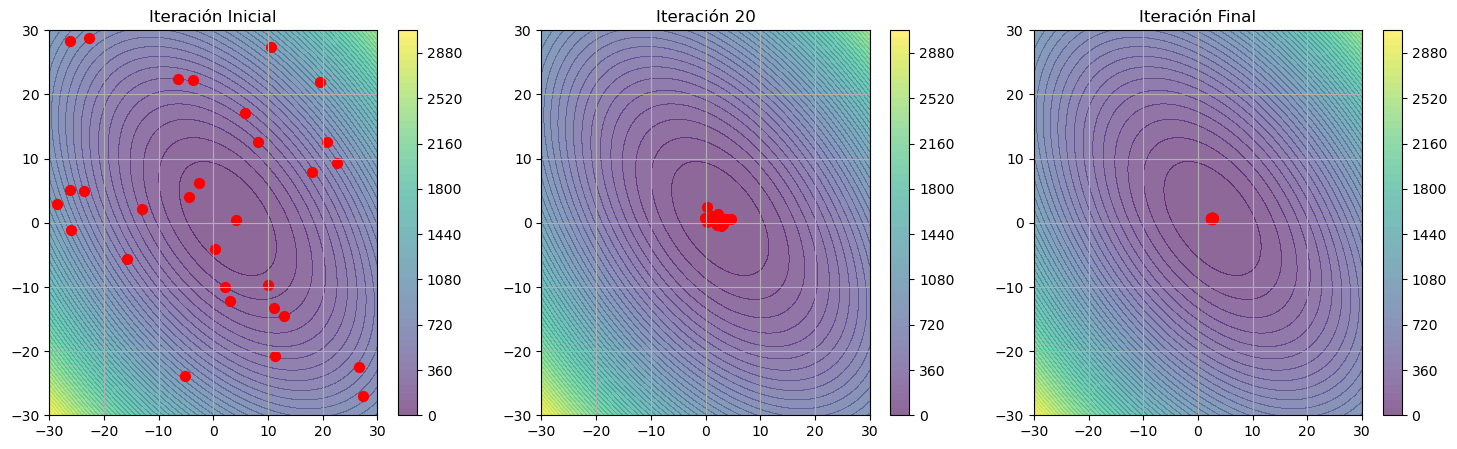

In [79]:
import numpy as np
import matplotlib.pyplot as plt
def pso(funcion_aptitud, dimensiones, lim_inf, lim_sup, n_particulas=30, w=0.5, c1=1.5, c2=1.5, max_iter=100):
    posiciones, velocidades = initialize_particles(n_particulas, dimensiones, lim_inf, lim_sup)
    pBest_posiciones = np.copy(posiciones)
    pBest_valores = np.array([funcion_aptitud(p) for p in posiciones])
    gBest_idx = np.argmin(pBest_valores)
    gBest_posicion = pBest_posiciones[gBest_idx]
    gBest_valor = pBest_valores[gBest_idx]
    
    history = {"iter_0": np.copy(posiciones)}
    
    for iteracion in range(max_iter):
        for i in range(n_particulas):
            r1 = np.random.rand(dimensiones)
            r2 = np.random.rand(dimensiones)
            velocidades[i] = (w * velocidades[i] + 
                              c1 * r1 * (pBest_posiciones[i] - posiciones[i]) + 
                              c2 * r2 * (gBest_posicion - posiciones[i]))
            posiciones[i] += velocidades[i]
            posiciones[i] = np.clip(posiciones[i], lim_inf, lim_sup)
        
        for i in range(n_particulas):
            aptitud = funcion_aptitud(posiciones[i])
            if aptitud < pBest_valores[i]:
                pBest_posiciones[i] = posiciones[i]
                pBest_valores[i] = aptitud
                if aptitud < gBest_valor:
                    gBest_posicion = posiciones[i]
                    gBest_valor = aptitud
        
        if iteracion == max_iter // 2:
            history["iter_half"] = np.copy(posiciones)
    
    history["iter_final"] = np.copy(posiciones)
    return gBest_posicion, gBest_valor, history


# Graficar la función de aptitud
def plot_function(ax, funcion_aptitud, lim_inf, lim_sup):
    x = np.linspace(lim_inf[0], lim_sup[0], 100)
    y = np.linspace(lim_inf[1], lim_sup[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = np.array([funcion_aptitud(np.array([x, y])) for x, y in zip(np.ravel(X), np.ravel(Y))])
    Z = Z.reshape(X.shape)
    contour = ax.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.6)
    plt.colorbar(contour, ax=ax)



dimensiones = 2  # Usamos 2 dimensiones para poder graficar
lim_inf = np.array([-30] * dimensiones)
lim_sup = np.array([30] * dimensiones)
max_iter = 40  # Define el número máximo de iteraciones

mejor_posicion, mejor_valor, history = pso(funcion_cuadratica, dimensiones, lim_inf, lim_sup, max_iter=max_iter)

print("Mejor posición:", mejor_posicion)
print("Mejor valor:", mejor_valor)

# Graficar posiciones de partículas en iteraciones seleccionadas junto con la función
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

def plot_particles(ax, posiciones, iteracion):
    plot_function(ax, funcion_cuadratica, lim_inf, lim_sup)
    ax.scatter(posiciones[:, 0], posiciones[:, 1], c='red', marker='o', s=50)
    ax.set_xlim(-30, 30)
    ax.set_ylim(-30, 30)
    ax.set_title(f'Iteración {iteracion}')
    ax.grid(True)

plot_particles(axes[0], history["iter_0"], 'Inicial')
plot_particles(axes[1], history["iter_half"], f'{max_iter // 2}')
plot_particles(axes[2], history["iter_final"], 'Final')

plt.show()


## Intervalo de prueba de [-10, 10] y de 2 dimensiones

In [47]:
#La función cuadrática utilizada solo se puede calcular para 2 dimensiones.

#Algoritmo Descenso del Gradiente
df1 = caluculo_result_gradiente(-10, 10, 2, funcion_cuadratica)

#Algoritmo Estandar PSO con 30 partículas y 100 iteraciones
df2 = calculo_result_enjambre(funcion_cuadratica,2, 30, 100, -10, 10)

#Algoritmo Paralelizado PSO con 30 partículas y 100 iteraciones por subconjunto (6)
df3 = calculo_paralelizacion(2, -10, 10, 6, 'cuadratica', 30, 100) 

#Unir dfs
resultado = pd.concat([df1, df2, df3], axis=1)
resultado

,Run,Tiempo_gradiente,valor_optimo_gradiente,Run,Tiempo_estandar,valor_optimo_estandar,Run,Tiempo_parale,valor_optimo_parale
0,1,0.001999,0.666667,1,0.050002,0.666667,1,0.310999,0.666667
1,2,0.001001,0.666667,2,0.047999,0.666667,2,0.302999,0.666667
2,3,0.000999,0.666667,3,0.055001,0.666667,3,0.320998,0.666667
3,4,0.001000,0.666667,4,0.045999,0.666667,4,0.301002,0.666667
4,5,0.001000,0.666667,5,0.046000,0.666667,5,0.326003,0.666667
5,Media,0.001200,0.666667,Media,0.049000,0.666667,Media,0.312400,0.666667


Se puede identificar que todos los modelos llegaron al punto de optimización. No obstante, la mayores diferencias radican en el tiempo de ejecución. Pues el Gradiente fue extremadamente rápido, luego sigue el estandar y por último el paralilizado, siendo el algoritmo que más tardó en ejecutarse.

## Intervalo de prueba de [-1000, 1000] y de 2 dimensiones

In [72]:
#La función cuadrática utilizada solo se puede calcular para 2 dimensiones.

#Algoritmo Descenso del Gradiente
df1 = caluculo_result_gradiente(-1000, 1000, 2, funcion_cuadratica)

#Algoritmo Estandar PSO con 30 partículas y 100 iteraciones
df2 = calculo_result_enjambre(funcion_cuadratica,2, 30, 100, -1000, 1000)

#Algoritmo Paralelizado PSO con 120 partículas y 100 iteraciones por subconjunto (6)
df3 = calculo_paralelizacion(2, -1000, 1000, 6, 'cuadratica', 120, 100) 

#Unir dfs
resultado = pd.concat([df1, df2, df3], axis=1)
resultado

,Run,Tiempo_gradiente,valor_optimo_gradiente,Run,Tiempo_estandar,valor_optimo_estandar,Run,Tiempo_parale,valor_optimo_parale
0,1,0.002954,0.666667,1,0.047027,0.666667,1,0.531999,0.666667
1,2,0.000998,0.666667,2,0.045003,0.666667,2,0.488000,0.666667
2,3,0.002001,0.666667,3,0.044997,0.666667,3,0.467000,0.666667
3,4,0.001001,0.666667,4,0.044001,0.666667,4,0.457000,0.666667
4,5,0.001001,0.666667,5,0.051973,0.666667,5,0.444000,0.666667
5,Media,0.001591,0.666667,Media,0.046600,0.666667,Media,0.477600,0.666667


Se puede evidenciar que el algoritmo de gradiente sigue durando muy poco aunque aumentó su tiempo de ejecución, pero sigue siendo el mas rápido. Es interesante notar que el PSO estádar más bien dueró menos tiempo que cuando el intervalo era mucho más pequeño mostrando que es más efectivo a mayor exigencia. Por otro lado el algoritmo paralelizado a pesar que duró más, fue necesario aumentar el número de particulas a 120 para que llegara al punto mínimo de la función.

#### Conclusión:
Se pudo evidenciar como en una función "bien portada" de dos variables el algoritmo PSO fue ampliamente vencido en efectividad y tiempo de ejecución por el Descenso Gradiente.

# Comparación Función Ackley: valor óptimo = 0